# Data preparation

## Load data

In [1]:
from oauth2client.service_account import ServiceAccountCredentials
import gspread

In [2]:
import pandas as pd
import numpy as np

In [3]:
def load_sheet():
    SHEET_NAME = "التوانسة كفاه ينتخبوا؟ (Responses)"
    KEY_FILENAME = "cred.json"
    scope = ['https://spreadsheets.google.com/feeds']
    credentials = ServiceAccountCredentials.from_json_keyfile_name(
        KEY_FILENAME, scope)
    gc = gspread.authorize(credentials)
    return gc.open(SHEET_NAME).sheet1

In [4]:
sheet = load_sheet()

ServerNotFoundError: Unable to find the server at accounts.google.com

In [ ]:
columns = {
    "Timestamp": "timestamp",
    "فيما يتعلق بتوقعاتي، أنا نحس أداء المجلس البلدي الحالي  مخيّب للآمال [‌‌]": "satisfaction_overall_1",
    "بعد الانتخابات الأخيرة، أنا في أغلب الأوقات نحس بخيبة أمل أكثر ملّي نحس برضا على أداء المجلس البلدي [‌‌]": "satisfaction_overall_2",
    "بصفة عامّة، أنا راضي(ة) على أداء المجلس البلدي الحالي [‌‌]": "satisfaction_overall_3",
    "فيما يتعلق بتوقعاتي،  نحس تعامل المجلس البلدي الحالي مع الفساد  مخيّب للآمال [‌‌]": "satisfaction_corruption_1",
    "بعد الانتخابات الأخيرة، أنا في أغلب الأوقات نحس بخيبة أمل أكثر ملّي نحس برضا على أداء المجلس البلدي في التعامل مع الفساد [‌‌]": "satisfaction_corruption_2",
    "بصفة عامة، أنا راضي(ة) على أداء المجلس البلدي الحالي في التعامل مع الفساد [‌‌]": "satisfaction_corruption_3",
    "فيما يتعلق بتوقعاتي،  نحس تعامل المجلس البلدي الحالي مع البنية التّحتيّة و تطويرها مخيّب للآمال [‌‌]": "satisfaction_infrastructure_1",
    "بعد الانتخابات الأخيرة، أنا في أغلب الأوقات نحسّ بخيبة أمل أكثر ملّي نحس برضا على أداء المجلس البلدي في التعامل مع البنية التّحتيّة وتطويرها [‌‌]": "satisfaction_infrastructure_2",
    "بصفة عامة، أنا راضي(ة) على أداء المجلس البلدي الحالي في  التعامل مع البنية التّحتيّة وتطويرها [‌‌]": "satisfaction_infrastructure_3",
    "فيما يتعلق بتوقعاتي،  نحس تعامل المجلس البلدي الحالي مع الشّفافيّة  مخيّب للآمال [‌‌]": "satisfaction_transparency_1",
    "بعد الانتخابات الأخيرة، أنا في أغلب الأوقات نحسّ بخيبة أمل أكثر ملّي نحس برضا على أداء المجلس البلدي في التعامل مع الشّفافيّة [‌‌]": "satisfaction_transparency_2",
    "بصفة عامة، أنا راضي(ة) على أداء المجلس البلدي الحالي في  التعامل مع الشّفافيّة [‌‌]": "satisfaction_transparency_3",
    "ديما بش نختار مرشحي/مرشحتى و الا حزبي قبل المنافسين [‌‌]": "loyalty_1",
    "ديما بش نفضل افكار  مرشحي/مرشحتى و الا حزبي قبل المنافسين [‌‌]": "loyalty_2",
    "ديما بش نختار توجّهات  مرشحي/مرشحتى و الا حزبي قبل توجّهات  المنافسين [‌‌]": "loyalty_3",
    "ديما بش نصوّت لمرشحي/لمرشحتى و الا حزبي ضد المنافسين [‌‌]": "loyalty_4",
    "وقت اللي نختار المترشحين و القوائم المترشحة للإنتخبات نقول [‌‌]": "involvement_1",
    "هل ترى انو  الأفراد و القوائم المترشحة للإنتخبات الكل كيف كيف ولا يفرقو على بعضهم؟  [‌‌]": "involvement_2",
    "قداش يهمك انك تختار المترشح(ة) او القائمة المناسبة ؟ [‌‌]": "involvement_3",
    "قداش يهمك تاثير خيارك على نتيجة الانتخابات البلدية ؟ [‌‌]": "involvement_4",
    " حسب رايك، في شكون عندك الثقة إنو ينجم يحقق الشفافية: المجلس البلدي الحالي متاع منطقتك او مجلس بلدي جديد؟": "projective_decision_1",
    " حسب رايك،  في شكون عندك الثقة إنو ينجم يحسن البنية التحتية:   المجلس البلدي الحالي متاع منطقتك او مجلس بلدي جديد؟": "projective_decision_2",
    " حسب رايك، في شكون عندك الثقة  إنو ينجم يحارب  الفساد: المجلس البلدي الحالي متاع منطقتك او مجلس بلدي جديد؟": "projective_decision_3",
    "حسب رايك، في شكون عندك الثقة إنو ينجم يعطي احسن مردود: المجلس البلدي الحالي  او مجلس بلدي جديد؟": "projective_decision_4",
    "بالنسبة لي، الأخبار التلفزيونية مصدر مهم للمعلومات في الانتخابات البلدية [‌‌]": "external_information_1",
    "بالنسبة لي،  الجرائد و المجلّات مصدر مهم للمعلومات بالنسبة للإنتخابات البلدية [‌‌]": "external_information_2",
    "بالنسبة لي، الإنترنت مصدر مهم للمعلومات بالنسبة للإنتخابات البلدية [‌‌]": "external_information_3",
    "بالنسبة لي، الدعاية السياسية هي مصدر مهم للمعلومات بالنسبة للإنتخابات البلدية [‌‌]": "external_information_4",
    "بالنسبة لي، الناس الآخرين (الصحاب،العايلة الخ) هوما مصدر مهم للمعلومات بالنسبة للإنتخابات البلدية [‌‌]": "external_information_5",
    "أنا واثق إني  باش نختار القائمة الانتخابية الصحيحة في الانتخابات البلدية الجاية [‌‌]": "confidence_1",
    "عندي ثقة في قدرتي باش ناخذ القرار الصحيح كيف نختار لشكون باش نصوت في الانتخابات البلدية [‌‌]": "confidence_2",
    "عندي ثقة في قدرتي باش نختار لشكون باش نصوت في الانتخابات البلدية [‌‌]": "confidence_3",
    "قداش عمرك ؟": "age",
    "الجنس": "gender",
    "شنوّة مستواك التّعليمي ؟": "education",
    "قدّاش الدخل الشّهري لعايلتك؟": "income",
    "ما هي حالتك الاجتماعية؟": "marital_status",
    "في انا قطاع تخدم؟": "employment",
    "شنوة اسم البلدية الي تسكن فيها": "residence",
    "فيما يتعلق بتوقعاتي، أنا نحس أداء المجلس البلدي الحالي  مخيّب للآمال [Row 2]": "satisfaction_overall_1_bis"
}

In [ ]:
df = pd.DataFrame(sheet.get_all_records())
df.rename(columns=columns, inplace=True)

In [ ]:
df.replace({"": np.nan}, inplace=True)

## Recode values

### Recode demographic / socioeconomic values

In [ ]:
df.age.replace({
    "أكثر من 64": ">64"
},
    inplace=True)

In [ ]:
df.education.replace({
    "ثانوي": "Highschool",
    "الجامعي": "Undergraduate",
    "الدراسات العليا": "Post-graduate",
    "أمي(ة)": "Illiterate",
}, inplace=True)

In [ ]:
df.employment.replace({
    "مسؤول(ة)": "Senior official",
    "موظف(ة) إداري(ة)": "Administrative employee",
    "موظف إداري": "Administrative employee",
    "باعث(ة) مشروع ، فلاح(ة) ، تاجر(ة)": "Liberal, agriculturer or merchant",
    "باعث مشروع ، فلاح ، تاجر": "Liberal, agriculturer or merchant",
    "بطّال(ة)": "Unemployed",
    "في الدّار (أب أو أم)": "Stay at home parent",
    "طالب(ة)": "Student",
    "étudiant ": "Student",
    "متقاعد(ة)": "Retired"
}, inplace=True)

In [ ]:
df.gender.replace({
    "أنثى": "F",
    "ذكر": "M"
}, inplace=True)

In [ ]:
df.income.replace({
    "أقل من 600": "<600",
    "بين 600 و1200": "600-1200",
    "اكثر من 1200": ">1200"
}, inplace=True)

In [ ]:
df.marital_status.replace({
    "عازب(ة)": "Single",
    "عازب": "Single",
    "متزوج(ة)": "Married",
    "متزوج": "Married",
    "مطلق(ة)": "Divorced",
    "أرمل(ة)": "Widowed"
}, inplace=True)

### Recode attitudinal columns (Likert scale)

In [ ]:
exclude = set(["satisfaction_overall_1_bis", "timestamp", "residence",
               "employment", "marital_status", "gender", "age", "income",
               "education"])
include = list(set(df.columns).difference(exclude))

In [ ]:
likert_strongly_agree = ["موافق برشا",
                         "موافق(ة) برشا",
                         "يهمني برشا شكون نختار",
                         "يهمني برشا",
                         "مختلفين على بعضهم"
                         ]

likert_agree = ["موافق",
                "موافق(ة)",
                "يهمني شكون نختار",
                "يهمني",
                "مختلفين على بعضهم مع شوية تشابه"
                ]

likert_indifferent = ["لا موافق(ة) لا مش موافق(ة)",
                      "لاٍموافق(ة) لا مش موافق(ة)",
                      "لاموافق(ة) لا مش موافق(ة)",
                      "لا يهمني لا ميهمنيش شكون نختار",
                      "لا يهمني لا ميهمنيش",
                      "لا موافق لا مش موافق",
                      "ما عنديش راى"
                      ]

likert_disagree = ["مش موافق",
                   "مانيش موافق(ة)",
                   "مش موافق(ة)",
                   "مش موافق, مش موافق(ة)",
                   "مايهمنيش",
                   "مايهمنيش شكون نختار",
                   "كيف كيف  مع شوية اختلاف"
                   ]
likert_strongly_disagree = ["مش موافق بالكل",
                            "مش موافق(ة) بالكل",
                            "مانيش موافق(ة) جملة",
                            "مايهمنيش جملة",
                            "مايهمنيش جملة شكون نختار",
                            "كيف كيف"
                            ]

In [ ]:
likert_scale = {}
for i in likert_strongly_agree:
    likert_scale[i] = 5
for i in likert_agree:
    likert_scale[i] = 4
for i in likert_indifferent:
    likert_scale[i] = 3
for i in likert_disagree:
    likert_scale[i] = 2
for i in likert_strongly_disagree:
    likert_scale[i] = 1

In [ ]:
projective_coded = {
    "المجلس البلدي الحالي": 0,
    "مجلس بلدي جديد": 1
}

In [ ]:
df.replace(likert_scale, inplace=True)
df.replace(projective_coded, inplace=True)

In [ ]:
df.fillna(df.mean(), inplace=True)

## Measured constructs

### Overall satisfaction

In [ ]:
n_variables = 3
satisfaction_overall_variables = [
    "satisfaction_overall_{}".format(i) for i in range(1, n_variables + 1)]
satisfaction_overall = df[satisfaction_overall_variables]

### Satisfaction with handling corruption

In [ ]:
n_variables = 3
satisfaction_corruption_variables = [
    "satisfaction_corruption_{}".format(i) for i in range(1, n_variables + 1)]
satisfaction_corruption = df[satisfaction_corruption_variables]

### Satisfaction with handling infrastructure


In [ ]:
n_variables = 3
satisfaction_infrastructure_variables = [
    "satisfaction_infrastructure_{}".format(i) for i in range(1, n_variables + 1)]
satisfaction_infrastructure = df[satisfaction_infrastructure_variables]

### Satisfaction with handling transparency

In [ ]:
n_variables = 3
satisfaction_transparency_variables = [
    "satisfaction_transparency_{}".format(i) for i in range(1, n_variables + 1)]
satisfaction_transparency = df[satisfaction_transparency_variables]

### Projective decision

In [ ]:
n_variables = 4
projective_decision_variables = [
    "projective_decision_{}".format(i) for i in range(1, n_variables + 1)]
projective_decision = df[projective_decision_variables]

### Loyalty

In [ ]:
n_variables = 4
loyalty_variables = ["loyalty_{}".format(i) for i in range(1, n_variables + 1)]
loyalty = df[loyalty_variables]

### Involvement with the decision

In [ ]:
n_variables = 4
involvement_variables = ["involvement_{}".format(
    i) for i in range(1, n_variables + 1)]
involvement = df[involvement_variables]

### Confidence (voter)

In [ ]:
n_variables = 3
confidence_variables = ["confidence_{}".format(
    i) for i in range(1, n_variables + 1)]
confidence = df[confidence_variables]

### Value of external information

In [ ]:
n_variables = 5
external_information_variables = [
    "external_information_{}".format(i) for i in range(1, n_variables + 1)]
external_information = df[external_information_variables]

## Score variables

In [ ]:
def score(construct):
    return construct.mean(axis=1)

### Overall satisfaction

In [ ]:
df["satisfaction_overall_score"] = score(satisfaction_overall)

### Satisfaction with handling corruption

In [ ]:
df["satisfaction_corruption_score"] = score(satisfaction_corruption)

### Satisfaction with handling transparency

In [ ]:
df["satisfaction_transparency_score"] = score(satisfaction_transparency)

### Satisfaction with handling infrastructure

In [ ]:
df["satisfaction_infrastructure_score"] = score(satisfaction_infrastructure)

### Projective decision

In [ ]:
df["projective_decision_score"] = score(projective_decision)

### Loyalty

In [ ]:
df["loyalty_score"] = score(loyalty)

### Involvement with the decision

In [ ]:
df["involvement_score"] = score(involvement)

### Confidence (voter)

In [ ]:
df["confidence_score"] = score(confidence)

# Analysis

In [130]:
import seaborn as sns
import scipy.stats as stats
sns.set_style("whitegrid")

## Crosstab analysis

### Gender and employment

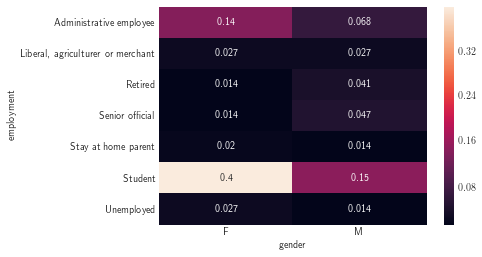

In [131]:
sns.heatmap(pd.crosstab(df.employment, df.gender, normalize=True), annot=True)

### Age and employment

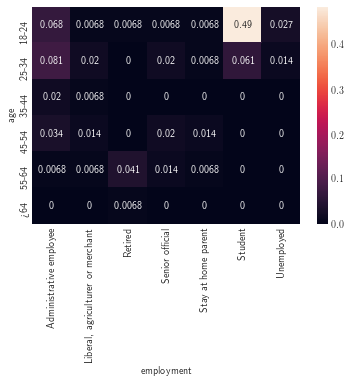

In [132]:
sns.heatmap(pd.crosstab(df.age, df.employment, normalize=True), annot=True)

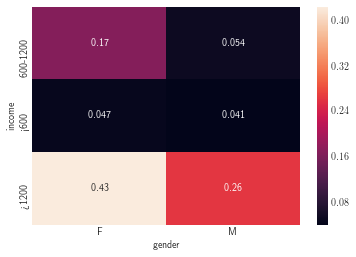

In [133]:
sns.heatmap(pd.crosstab(df.income, df.gender, normalize=True), annot=True)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f70e0b41bf8> (for post_execute):


RuntimeError: LaTeX was not able to process the following string:
b'marital_status'

Here is the full report generated by LaTeX:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./50dceb62f94e6c8918d38f7f27a30de7.tex
LaTeX2e <2017-04-15>
Babel <3.12> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file 50dceb62f94e6c8918d38f7f27a30de7.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.12 ...e{10.000000}{12.500000}{\sffamily marital_
                                                  status}
! Extra }, or forgotten $.
l.12 ...0000}{12.500000}{\sffamily marital_status}
                                                  
! Missing $ inserted.
<inserted text> 
                $
l.13 \end{document}
                   
[1] (./50dceb62f94e6c8918d38f7f27a30de7.aux) )
(\end occurred inside a group at level 1)

### simple group (level 1) entered at line 12 ({)
### bottom level
(see the transcript file for additional information)
Output written on 50dceb62f94e6c8918d38f7f27a30de7.dvi (1 page, 356 bytes).
Transcript written on 50dceb62f94e6c8918d38f7f27a30de7.log.
 



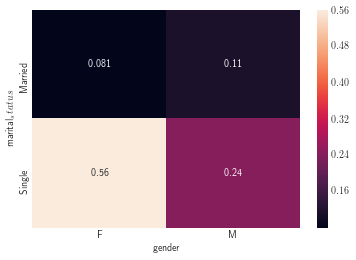

In [134]:
sns.heatmap(pd.crosstab(df.marital_status, df.gender, normalize=True), annot=True)

## ANOVA

In [135]:
def anova(categorical, continuous):
    groups = df[[categorical, continuous]].groupby(categorical).groups
    continuous_groups = list(
        map(lambda group: df[continuous].iloc[groups[group]], groups))
    return stats.f_oneway(*continuous_groups)

### Overall satisfaction

#### ANOVA between overall satisfaction and gender

In [136]:
anova(categorical="gender", continuous="satisfaction_overall_score")

F_onewayResult(statistic=0.18434509357413398, pvalue=0.66829835314848729)

#### ANOVA between overall satisfaction and age

In [137]:
anova("age", "satisfaction_overall_score")

F_onewayResult(statistic=0.64377425284226297, pvalue=0.66667020065733462)

#### ANOVA between overall satisfaction and employment

In [138]:
anova("employment", "satisfaction_overall_score")

F_onewayResult(statistic=1.3798000320595192, pvalue=0.22676150749583723)

#### ANOVA between overall satisfaction and marital status

In [139]:
anova("marital_status", "satisfaction_overall_score")

F_onewayResult(statistic=0.20859916531766895, pvalue=0.64854635699831542)

#### ANOVA between overall satisfaction and income

In [140]:
anova("income", "satisfaction_overall_score")

F_onewayResult(statistic=0.23694758070260746, pvalue=0.78933755662327809)

### Satisfaction with handling corruption

#### ANOVA between satisfaction with handling corruption and gender

In [141]:
anova(categorical="gender", continuous="satisfaction_corruption_score")

F_onewayResult(statistic=0.72795633215303879, pvalue=0.39494400719340339)

#### ANOVA between satisfaction with handling corruption and age

In [142]:
anova("age", "satisfaction_corruption_score")

F_onewayResult(statistic=0.79568060104992, pvalue=0.5544841586774969)

#### ANOVA between satisfaction with handling corruption and employment

In [143]:
anova("employment", "satisfaction_corruption_score")

F_onewayResult(statistic=1.3162473564404435, pvalue=0.25372351590728753)

#### ANOVA between satisfaction with handling corruption  and marital status

In [144]:
anova("marital_status", "satisfaction_corruption_score")

F_onewayResult(statistic=2.7770482552707536, pvalue=0.097768217378626801)

#### ANOVA between satisfaction with handling corruption  and income

In [145]:
anova("income", "satisfaction_corruption_score")

F_onewayResult(statistic=0.43782457448399192, pvalue=0.64628941132872164)

### Satisfaction with handling infrastructure

#### ANOVA between satisfaction with handling infrastructure and gender

In [146]:
anova(categorical="gender", continuous="satisfaction_infrastructure_score")

F_onewayResult(statistic=0.041168368932068933, pvalue=0.83949576408066684)

#### ANOVA between satisfaction with handling infrastructure and age

In [147]:
anova("age", "satisfaction_infrastructure_score")

F_onewayResult(statistic=0.34049599346527987, pvalue=0.88761962038782471)

#### ANOVA between satisfaction with handling infrastructure and employment

In [148]:
anova("employment", "satisfaction_infrastructure_score")

F_onewayResult(statistic=0.53061516503808714, pvalue=0.78430837572090661)

#### ANOVA between satisfaction with handling infrastructure  and marital status

In [149]:
anova("marital_status", "satisfaction_infrastructure_score")

F_onewayResult(statistic=0.81823616042967839, pvalue=0.36718658305897323)

#### ANOVA between satisfaction with handling infrastructure  and income

In [150]:
anova("income", "satisfaction_infrastructure_score")

F_onewayResult(statistic=0.82707627986454757, pvalue=0.43937841998149718)

### Satisfaction with handling transparency

#### ANOVA between satisfaction with handling transparency and gender

In [151]:
anova(categorical="gender", continuous="satisfaction_transparency_score")

F_onewayResult(statistic=1.0547119346978155, pvalue=0.30612285232618275)

#### ANOVA between satisfaction with handling transparency and age

In [152]:
anova("age", "satisfaction_transparency_score")

F_onewayResult(statistic=0.26255376787379991, pvalue=0.93281081483026995)

#### ANOVA between satisfaction with handling transparency and employment

In [153]:
anova("employment", "satisfaction_transparency_score")

F_onewayResult(statistic=1.0891443252356232, pvalue=0.37184468474764215)

#### ANOVA between satisfaction with handling transparency  and marital status

In [154]:
anova("marital_status", "satisfaction_transparency_score")

F_onewayResult(statistic=0.70909987988157508, pvalue=0.401120048973721)

#### ANOVA between satisfaction with handling transparency  and income

In [155]:
anova("income", "satisfaction_transparency_score")

F_onewayResult(statistic=1.3346777797282621, pvalue=0.26645731161162645)

### Confidence (voter)

#### ANOVA between confidence and gender

In [156]:
anova("gender", "confidence_score")

F_onewayResult(statistic=0.37758327364987798, pvalue=0.53985588049346078)

#### ANOVA between confidence and age

In [157]:
anova("age", "confidence_score")

F_onewayResult(statistic=0.91943114526677727, pvalue=0.47033738017301474)

#### ANOVA between confidence and employment

In [158]:
anova("employment", "confidence_score")

F_onewayResult(statistic=0.79650138787612235, pvalue=0.57416020462254558)

#### ANOVA between confidence and marital status

In [159]:
anova("marital_status", "confidence_score")

F_onewayResult(statistic=0.44809868191043434, pvalue=0.50429645409390078)

#### ANOVA between confidence and income

In [160]:
anova("income", "confidence_score")

F_onewayResult(statistic=1.1485093908236017, pvalue=0.31997664286091426)

### Loyalty

#### ANOVA between loyalty and gender

In [161]:
anova(categorical="gender", continuous="loyalty_score")

F_onewayResult(statistic=0.23290334054585751, pvalue=0.63010214492313488)

#### ANOVA between loyalty and age

In [162]:
anova(categorical="age", continuous="loyalty_score")

F_onewayResult(statistic=4.2636300338580781, pvalue=0.0012132798369676751)

#### ANOVA between loyalty and employment

In [163]:
anova(categorical="employment", continuous="loyalty_score")

F_onewayResult(statistic=2.8951446302704893, pvalue=0.010827120951770131)

#### ANOVA between loyalty and marital_status

In [164]:
anova(categorical="marital_status", continuous="loyalty_score")

F_onewayResult(statistic=15.90022965610536, pvalue=0.0001051783490714185)

#### ANOVA between loyalty and income

In [165]:
anova(categorical="income", continuous="loyalty_score")

F_onewayResult(statistic=0.6225266111339659, pvalue=0.53801484440932446)

### Comparative prospective performance expectations

#### ANOVA between comparative prospective performance expectations and gender

In [166]:
anova(categorical="gender", continuous="projective_decision_score")

F_onewayResult(statistic=0.01905412983305798, pvalue=0.89040161081859659)

#### ANOVA between comparative prospective performance expectations and age

In [167]:
anova(categorical="age", continuous="projective_decision_score")

F_onewayResult(statistic=0.17273750476140876, pvalue=0.97234659393242384)

#### ANOVA between comparative prospective performance expectations and employment

In [168]:
anova(categorical="employment", continuous="projective_decision_score")

F_onewayResult(statistic=0.33941382781214491, pvalue=0.91500275935333608)

#### ANOVA between comparative prospective performance expectations and marital_status

In [169]:
anova(categorical="marital_status", continuous="projective_decision_score")

F_onewayResult(statistic=1.2333471831488056, pvalue=0.26858273567848256)

#### ANOVA between comparative prospective performance expectations and income

In [170]:
anova(categorical="income", continuous="projective_decision_score")

F_onewayResult(statistic=1.3959825054901607, pvalue=0.250896995734813)

### Involvement with voting decision

#### ANOVA between Involvement with voting decision and gender

In [171]:
anova(categorical="gender", continuous="involvement_score")

F_onewayResult(statistic=0.28338368781731871, pvalue=0.59530116016608337)

#### ANOVA between Involvement with voting decision and age

In [172]:
anova(categorical="age", continuous="involvement_score")

F_onewayResult(statistic=1.1645902002321609, pvalue=0.32960007156577448)

#### ANOVA between Involvement with voting decision and employment

In [173]:
anova(categorical="employment", continuous="involvement_score")

F_onewayResult(statistic=1.0431251177808172, pvalue=0.40008559954195505)

#### ANOVA between Involvement with voting decision and marital_status

In [174]:
anova(categorical="marital_status", continuous="involvement_score")

F_onewayResult(statistic=0.64370203917770541, pvalue=0.42367742899810734)

#### ANOVA between Involvement with voting decision and income

In [175]:
anova(categorical="income", continuous="involvement_score")

F_onewayResult(statistic=0.36548382862671214, pvalue=0.69449821813735091)

## Linear regression

In [176]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [217]:
def lreg(x, y, xlabel, ylabel, save=False):
    sns.jointplot(x=df[x],
                  y=df[y],
                  data=df,
                  kind="reg",
                  x_jitter=0.05,
                  y_jitter=0.05)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if save:
        plt.tight_layout()
        plt.savefig("/home/iyed/Projects/municipal_elections_tunisia_2018/plots/{}.pdf".format(xlabel.replace(" ", "_")), dpi=1200)

#### Confidence

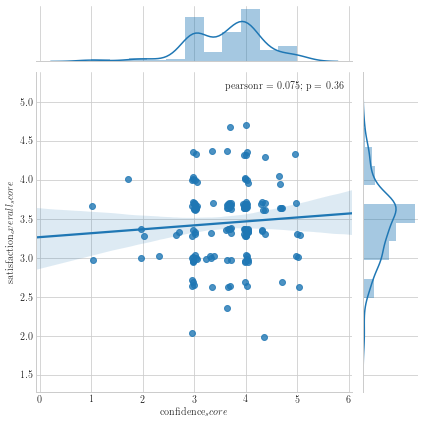

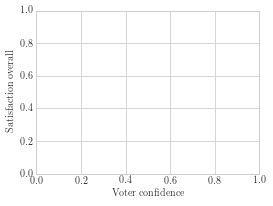

In [216]:
lreg("confidence_score", "satisfaction_overall_score",
     "Voter confidence", "Satisfaction overall", save=False)

#### Involvement

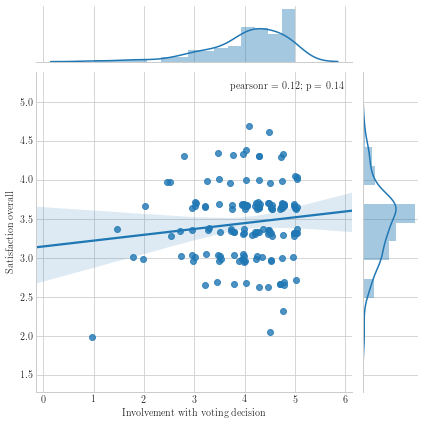

In [203]:
lreg("involvement_score", "satisfaction_overall_score",
     "Involvement with voting decision", "Satisfaction overall", save=True)

#### Loyalty

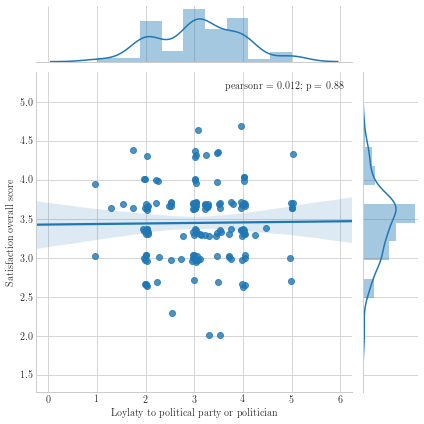

In [204]:
lreg("loyalty_score", "satisfaction_overall_score",
     "Loylaty to political party or politician", "Satisfaction overall score", save=True)

#### Satisfaction corruption

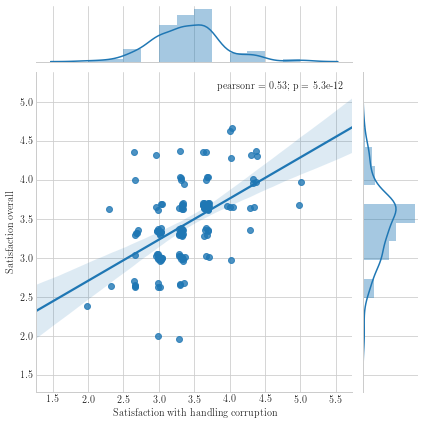

In [205]:
lreg("satisfaction_corruption_score", "satisfaction_overall_score",
     "Satisfaction with handling corruption", "Satisfaction overall", save=True)

#### Satisfaction infrastructure

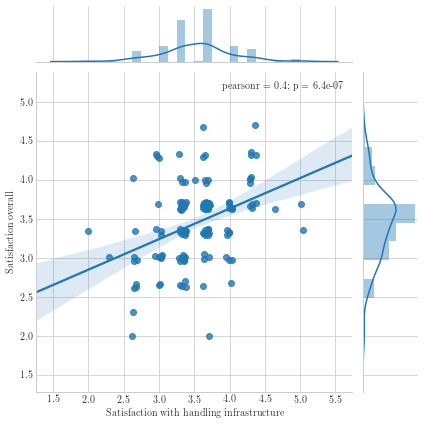

In [206]:
lreg("satisfaction_infrastructure_score", "satisfaction_overall_score",
     "Satisfaction with handling infrastructure", "Satisfaction overall", save=True)

#### Satisfaction transparency

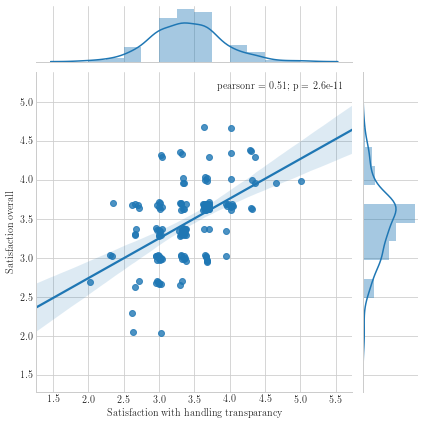

In [207]:
lreg("satisfaction_transparency_score", "satisfaction_overall_score",
     "Satisfaction with handling transparancy", "Satisfaction overall", save=True)

#### comparative prospective performance expectations

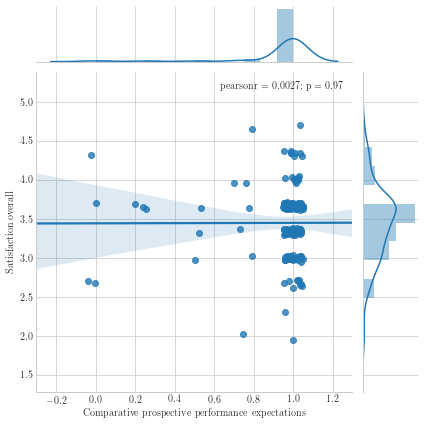

In [208]:
lreg("projective_decision_score",
     "satisfaction_overall_score",
     "Comparative prospective performance expectations",
     "Satisfaction overall",
     save=True)

In [218]:
len(columns)

41

In [228]:
anova(categorical="age", continuous="external_information_5")

F_onewayResult(statistic=3.4212073787051942, pvalue=0.0059876156300278528)

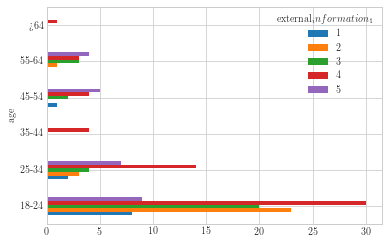

In [237]:
pd.crosstab(df.age, df.external_information_1).plot(kind="barh")

In [271]:
def heat_infor(x, y, xlabel, ylabel, save=False):
    sns.heatmap(pd.crosstab(
        df[x],
        df[y]
    ), annot=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if save:
        plt.tight_layout()
        plt.savefig("/home/iyed/Projects/municipal_elections_tunisia_2018/plots/{}.pdf".format(
            xlabel.replace(" ", "_")), dpi=1200)

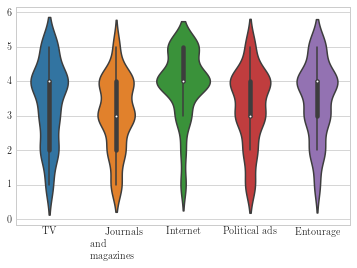

In [270]:
sns.violinplot(data=external_information.rename(columns={"external_information_1": "TV",
                                                         "external_information_2": r"Journals \\ and \\ magazines",
                                                         "external_information_3": "Internet",
                                                         "external_information_4": "Political ads",
                                                         "external_information_5": "Entourage"}))

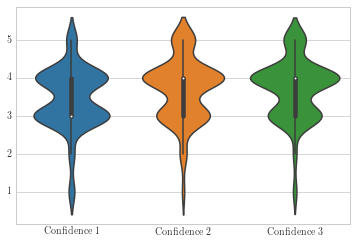

In [274]:
sns.violinplot(data=confidence.rename(columns={"confidence_1": "Confidence 1",
                                              "confidence_2": "Confidence 2",
                                              "confidence_3": "Confidence 3"}))

In [273]:
confidence.columns

Index(['confidence_1', 'confidence_2', 'confidence_3'], dtype='object')

In [276]:
df.to_csv("/home/iyed/Desktop/municipal_dataset.csv")